<a href="https://colab.research.google.com/github/iveliz/ModelosClasificacionMachineLearning/blob/main/ModelosClasificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pandas
# !pip install sklearn

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#-----MODEL things

#Preprocessing things
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#----- SHOWING OFF
from tabulate import tabulate
# Matriz de confucion

In [ ]:
chunks = [(2247, 8354)] # 
df = pd.DataFrame()
for start, end  in chunks:  
  chunk = pd.read_csv('/content/drive/MyDrive/ML-LASTLONG/dataset_fuel_consumption_2016_2022.csv', 
              header=start, nrows=end, usecols=range(0,15))
  df = df.append(chunk)
df = df.dropna()
# df = df.drop(index=0).reset_index(drop=True)

<ipython-input-4-9cc63dbb080b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(chunk)


In [ ]:
# df = df.dropna() # Hacemos un drop de los que tengan valores (NaN) en tre sus celdas 
# df.head()

In [ ]:
# Verficamos que no existan mas valores NAN 
null_rows = df.isnull().any(axis=1)
rows_with_nulls = df[null_rows]
rows_with_nulls
# df.isna().sum()

# df = df.dropna() # NaN = Not a number

In [ ]:
# if df.iloc[0].isna().sum() > 5:
#     print('The first row has: ',df.iloc[0].isna().sum() ,' NaN values')
#     df = df.drop(0)
# else:
#     print("The first row doesn't have NaN values.")
# df = df.drop(columns=df.columns[12:])

# df = df.iloc[:, :-4]
# df = df.drop(index=0).reset_index(drop=True)

# **Renombramiento de features**
Renombramos los features con los especificados en el proyecto

In [ ]:
# Creamos un dict con los nuevos nombres para los respectivos nombres ya capturados

df.rename(columns = {'Model': 'MODEL YEAR', 
                     'Make': 'MAKE', 'Model.1': 'MODEL', 'Vehicle Class': 'VEHICLE CLASS','FUEL': 'FUEL TYPE', 
                     'Engine Size':'ENGINE SIZE (L)',                     
                     'Transmission': 'TRANSMISSION',
                     'Fuel':'FUEL TYPE',
                     'Fuel Consumption':'FUEL CONSUMPTION CITY (L/100 km)', 
                     'Unnamed: 9':'FUEL CONSUMPTION HWY (L/100 km)', 
                     'Unnamed: 10':'FUEL CONSUMPTION COMB (L/100 km)',  
                     'Unnamed: 11':'FUEL CONSUMPTION COMB (mpg)',   
                     'CO2 Emissions':'CO2 EMISSIONS (g/km)',
                     'CO2':'CO2 Rating',
                     'Smog':'Smog Rating',
                     }, 
                     inplace=True)


In [ ]:
# df.head()
# df.isna().sum()
# df.tail()
# print("size:",df.size)
# print("size:",df.shape)
# df['Unnamed: 10 COMB (L/100 km)']
# df['CYLINDERS'].value_counts()
[i for i in df.columns]

['MODEL YEAR',
 'MAKE',
 'MODEL',
 'VEHICLE CLASS',
 'ENGINE SIZE (L)',
 'Cylinders',
 'TRANSMISSION',
 'FUEL TYPE',
 'FUEL CONSUMPTION CITY (L/100 km)',
 'FUEL CONSUMPTION HWY (L/100 km)',
 'FUEL CONSUMPTION COMB (L/100 km)',
 'FUEL CONSUMPTION COMB (mpg)',
 'CO2 EMISSIONS (g/km)',
 'CO2 Rating',
 'Smog Rating']

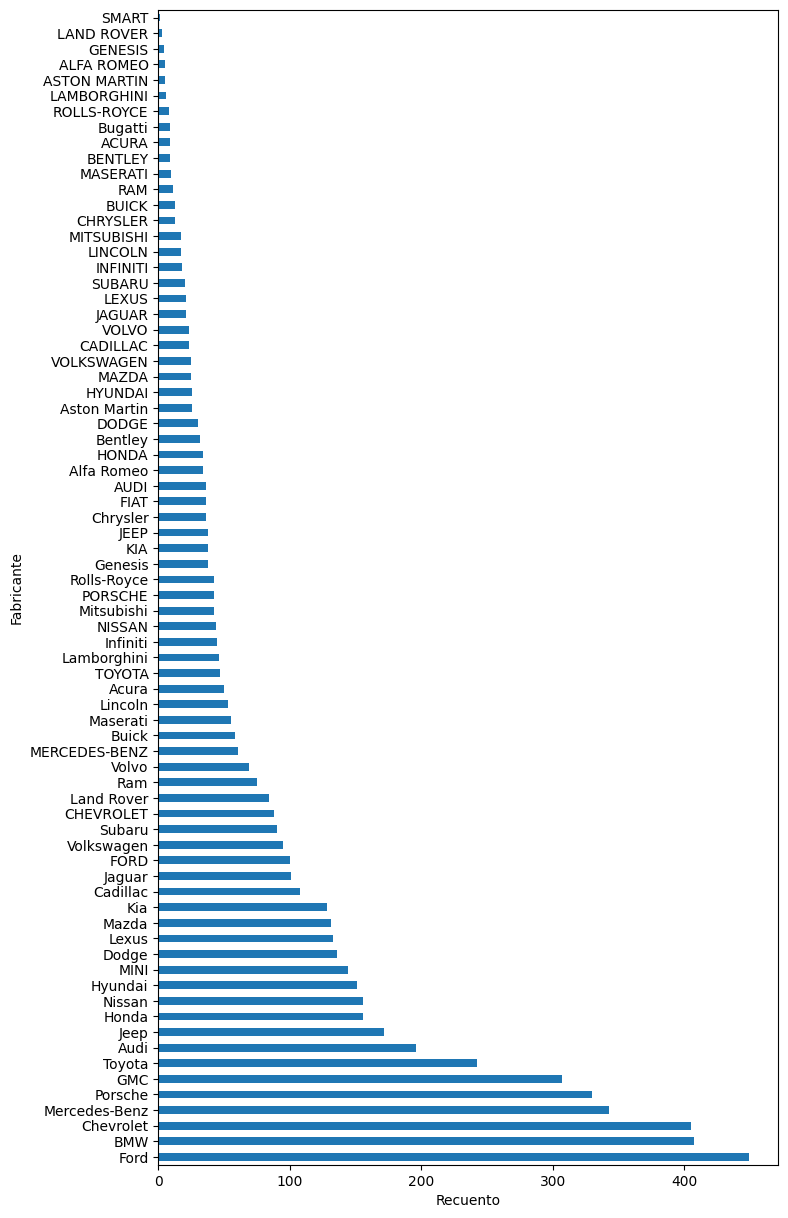

In [ ]:
plt.figure(figsize=(8, 15))  # set figure size
df['MAKE'].value_counts().plot.barh()
plt.xlabel('Recuento')
plt.ylabel('Fabricante')
plt.show()

In [ ]:
# viz = df[['Cylinders','Engine Size','CO2 Emissions','Fuel Consumption']]
# viz.hist()
# plt.show()

# -----
# sns.barplot(x = 'Vehicle Class', y= 'Fuel Consumption',hue = 'Model' ,data = df)

In [ ]:
# df['Smog'].value_counts()
# sns.countplot(df['Smog Rating'])
df.isna().sum()

MODEL YEAR                          0
MAKE                                0
MODEL                               0
VEHICLE CLASS                       0
ENGINE SIZE (L)                     0
Cylinders                           0
TRANSMISSION                        0
FUEL TYPE                           0
FUEL CONSUMPTION CITY (L/100 km)    0
FUEL CONSUMPTION HWY (L/100 km)     0
FUEL CONSUMPTION COMB (L/100 km)    0
FUEL CONSUMPTION COMB (mpg)         0
CO2 EMISSIONS (g/km)                0
CO2 Rating                          0
Smog Rating                         0
dtype: int64

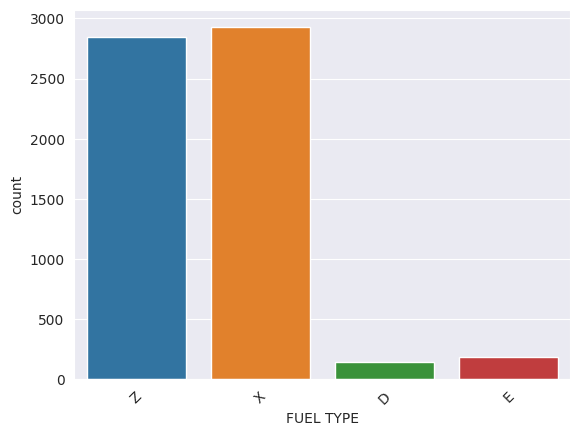

In [ ]:
sns.set_style('darkgrid')
# create the countplot
ax = sns.countplot(x=df['FUEL TYPE'])
# set the x-axis label
ax.set_xlabel('FUEL TYPE')
# rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)
# display the plot
plt.show()

In [ ]:
df.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE (L)',
       'Cylinders', 'TRANSMISSION', 'FUEL TYPE',
       'FUEL CONSUMPTION CITY (L/100 km)', 'FUEL CONSUMPTION HWY (L/100 km)',
       'FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION COMB (mpg)',
       'CO2 EMISSIONS (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [ ]:
# df_fueltype = df.groupby(['FUEL TYPE'],as_index=False).mean()
# df_fueltype

## **Codificación de datos tipo STR(Cadena)**
Se ha de codificar (Porque la computadora y los modelos matemáticos sólo pueden trabajar con datos numéricos, por lo que es necesario codificar los tipos de datos de cadena en números): 
Para maker seria: 

| MAKE | EncodedLabel |
| --- | --- | 
| ACURA | 0 |
| ALFA ROMEO | 1 |
| ASTON MARTIN | 2 |

Para MODEL:

| MODEL.1 | EncodedLabel |
| --- | --- | 
| ILX | 355 |
| ILX HYBRID | 356 |
|  MDX SH-AWD | 422 |




In [ ]:
# df.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE (L)',
       'Cylinders', 'TRANSMISSION', 'FUEL TYPE',
       'FUEL CONSUMPTION CITY (L/100 km)', 'FUEL CONSUMPTION HWY (L/100 km)',
       'FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION COMB (mpg)',
       'CO2 EMISSIONS (g/km)', 'CO2 Rating', 'Smog Rating', 'MODEL.1'],
      dtype='object')

In [ ]:
label_encoder = preprocessing.LabelEncoder()
# PRE-TREATEMENT LABELING ----------- [IMP 1]
make_values = label_encoder.fit_transform(df['MAKE'])
model_values = label_encoder.fit_transform(df['MODEL'])
vehicleClass_values = label_encoder.fit_transform(df['VEHICLE CLASS'])
transmition_values = label_encoder.fit_transform(df['TRANSMISSION'])  #TRANSMISSION 
fuel_type = label_encoder.fit_transform(df['FUEL TYPE'])   

# create a dictionary mapping original names to encoded labels
make_to_label = dict(zip(df['MAKE'], make_values))
model_to_label = dict(zip(df['MODEL'], model_values))
vehicle_to_label = dict(zip(df['VEHICLE CLASS'], vehicleClass_values))
transmition_to_label = dict(zip(df['TRANSMISSION'], transmition_values))
fuel_to_label = dict(zip(df['FUEL TYPE'], fuel_type))

# create a table of original names and encoded labels
table1 = {'MAKE': list(make_to_label.keys()), 'EncodedLabel': list(make_to_label.values())}
table2 = {'MODEL': list(model_to_label.keys()), 'EncodedLabel': list(model_to_label.values())}
table3 = {'VEHICLE CLASS': list(vehicle_to_label.keys()), 'EncodedLabel': list(vehicle_to_label.values())}
table4 = {'TRANSMISSION': list(transmition_to_label.keys()), 'EncodedLabel': list(transmition_to_label.values())}
table5 = {'FUEL TYPE': list(fuel_to_label.keys()), 'EncodedLabel': list(fuel_to_label.values())}

# TREATEMENT -----------[IMP 2]
df['MAKE'] = label_encoder.fit_transform(df['MAKE']) # Nissan ->  2
df['MODEL'] = label_encoder.fit_transform(df['MODEL']) # C -> 3
df['VEHICLE CLASS'] = label_encoder.fit_transform(df['VEHICLE CLASS'])
df['TRANSMISSION'] = label_encoder.fit_transform(df['TRANSMISSION'])  #TRANSMISSION 
df['FUEL TYPE'] = label_encoder.fit_transform(df['FUEL TYPE'])       


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

# ----------- TARGET -------: CO2 EMISSIONS  (g/km)
X = df.drop(columns = ['CO2 EMISSIONS (g/km)'])
y = df['CO2 EMISSIONS (g/km)']  # Nissan 5 D 15 45 5 5 dd ->  45
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% 20
model = clf.fit(X_train , y_train)

In [ ]:
print(tabulate(table2, headers=[list(table2.keys())[0], list(table2.keys())[1]], tablefmt="grid"))
#              table(n)              table(n)                table(n)

In [ ]:
# name_to_label = dict(zip(df['MAKE'], df['MAKE']))
# # create a table of original names and encoded labels
# table = {'OriginalName': list(name_to_label.keys()), 'EncodedLabel': list(name_to_label.values())}

In [ ]:
predictions = model.predict(X_test) # Datos de prueba
score = accuracy_score(y_test, predictions) # 50 <- # 50
score  # 
# len(y_test)
# print(y_test.item[0], predictions.item[0] )

0.6396396396396397

In [ ]:
# matrix = confusion_matrix(y_test, predictions)
# disp = ConfusionMatrixDisplay(matrix )
# disp.plot()
# plt.show()

##**KNeighborsClassifier**
Support Vector Machines

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train , y_train)  
predictionsKN = neigh.predict(X_test)

In [ ]:
scoreKN = accuracy_score(y_test, predictionsKN)
print(scoreKN)

0.20393120393120392


In [ ]:
from sklearn.svm import SVC
clf_SVC = SVC()
clf_SVC.fit(X_train, y_train)
predictions_SVC = clf_SVC.predict(X_test)
clf_SVC.score(X_test, predictions_SVC)

1.0

# Confussion Matrix

In [ ]:
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, predictions_SVC, labels=clf_SVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                 display_labels=clf_SVC.classes_)
# disp.plot()
# plt.show()
# print(classification_report(y_test, predictions_SVC))

NameError: ignored

In [ ]:
scoreSVC = accuracy_score(y_test, predictions_SVC)
scoreSVC
# clf_SVC.score(X_test, predictions_SVC)
scoreSVC*100

1.4742014742014742

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_Rand = RandomForestClassifier(random_state=0) # 
clf_Rand.fit(X_train, y_train)
predictions_Rand = clf_Rand.predict(X_test)
scoreRand = accuracy_score(y_test, predictions_Rand)
scoreRand*100 # 

68.05896805896806